In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Sample.csv')
data

,Teams,Played,Won,Draw,Lost,Points
0,Liv,14,4,1,0,0.40
1,Lei,14,8,2,2,0.60
2,Mnc,14,6,2,3,0.55
3,Che,14,1,2,4,0.23
4,Wol,14,3,5,4,0.29
5,Cry,14,9,5,4,0.87
6,Tot,14,8,4,4,0.60
7,Ars,14,7,6,4,0.58


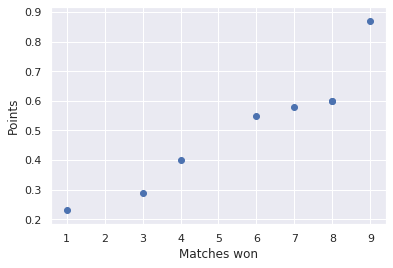

In [3]:
x = data['Won']
y = data['Points']
plt.scatter(x,y)
plt.xlabel('Matches won')
plt.ylabel('Points')
plt.show()

In [4]:
x1 = data[['Won','Points']]

In [5]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x1)
x_scaled

array([[-0.6644106 , -0.60297088],
       [ 0.8542422 ,  0.44567413],
       [ 0.0949158 ,  0.18351288],
       [-1.80340019, -1.49431914],
       [-1.0440738 , -1.17972564],
       [ 1.23390539,  1.86134489],
       [ 0.8542422 ,  0.44567413],
       [ 0.474579  ,  0.34080963]])

kmeans = KMeans(4)
kmeans.fit(x1)

In [6]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusters = kmeans.fit_predict(x1)
identified_clusters

In [7]:
identified_clusters = kmeans.fit_predict(x_scaled)
identified_clusters

array([3, 1, 1, 0, 3, 2, 1, 1], dtype=int32)

In [8]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster

,Teams,Played,Won,Draw,Lost,Points,Cluster
0,Liv,14,4,1,0,0.40,3
1,Lei,14,8,2,2,0.60,1
2,Mnc,14,6,2,3,0.55,1
3,Che,14,1,2,4,0.23,0
4,Wol,14,3,5,4,0.29,3
5,Cry,14,9,5,4,0.87,2
6,Tot,14,8,4,4,0.60,1
7,Ars,14,7,6,4,0.58,1


<function matplotlib.pyplot.show(*args, **kw)>

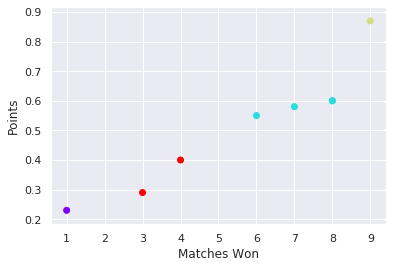

In [9]:
plt.scatter(data_with_cluster['Won'],data_with_cluster['Points'],c=data_with_cluster['Cluster'],cmap='rainbow')
plt.xlabel('Matches Won')
plt.ylabel('Points')
plt.show

In [ ]:
wcss=[]
for i in range(1,6):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

In [ ]:
num = range(1,6)
plt.plot(num,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()